<a href="https://colab.research.google.com/github/chaitanyapatil26/chaitanyapatil26/blob/main/Copy_of_translation_german_to_english_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@chaitanya patil

In [103]:

import string
import re
from numpy import array,argmax,random,take
import pandas as pd
from keras.models import sequential
from keras.layers import Dense,LSTM,Embedding,Bidirectional,RepeatVector,TimeDistributed
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option ('display.max_colwidth',200)



In [ ]:
def read_text(filename):
  #open the file
  file = open (filename,  mode= 'rt',  encoding = 'utf-8')
  #read all text
  text = file.read()
  file.close()
  return text

In [ ]:
def  to_lines (text):
     sents =text.strip().split ('\n')
     sents =[i.split('\t')for i in sents]
     return sents

In [ ]:
data = read_text ("/content/drive/MyDrive/deu.txt/deu..txt") 
deu_eng = to_lines(data)
deu_eng = array(deu_eng)

In [ ]:
deu_eng [:50000,:]

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'GrÃ¼ÃŸ Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ["It's dry.", 'Es ist trocken.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #8692611 (canan) & #8692613 (canan)'],
       ["It's his.", 'Es ist seins.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2187229 (CK) & #6626100 (Felixjp)'],
       ["It's hot.", 'Es ist heiÃŸ.',
        'CC-BY 2.0 (France) Attribution: t']], dtype='<U98')

In [ ]:
deu_eng

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'GrÃ¼ÃŸ Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ["It's dry.", 'Es ist trocken.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #8692611 (canan) & #8692613 (canan)'],
       ["It's his.", 'Es ist seins.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2187229 (CK) & #6626100 (Felixjp)'],
       ["It's hot.", 'Es ist heiÃŸ.',
        'CC-BY 2.0 (France) Attribution: t']], dtype='<U98')

In [111]:
eng_tokenizer = []
deu_tokenizer = []

for i in deu_eng[:,0]:
  eng_1.append(len(i.split()))

for i in deu_eng[:,1]:
  deu_1.append(len(i.split()))

In [ ]:
length_df = pd.DataFrame({'eng':eng_1, 'deu':deu_1})

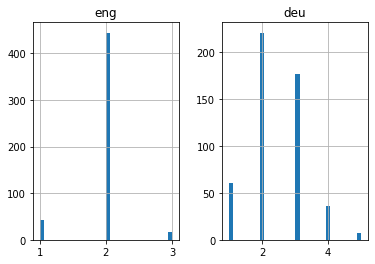

In [ ]:
length_df.hist(bins = 30)
plt.show()

In [108]:
def tokenization (lines):
  Tokenizer = tokenizer
  tokenizer.fit_on_texts(lines)
  return Tokenizer

In [122]:
eng_tokenizer = tokenization (deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

NameError: ignored

In [123]:
deu_tokenizer = tokenization(deu_eng[:,1])
deu_vocab_size = len(eng_tokenizer.word_index) + 1

deu_length = 8
print ('dutch vocabulary size:%d'% deu_vocab_size)

NameError: ignored

In [ ]:
#encode and pad sequences
def encode_sequences (tokenizer,length,lines):
  #integer encode sequences
  seq = tokenizer.texts_to_sequences(lines)
  # pad sequences with 0 values
  seq = pad_sequences(seqm,maxlen=length,padding='post')
  return seq

In [ ]:
from sklearn.model_selection import train_test_split
train, text = train_test_split(deu_eng,test_size=0.2,random_state =12 )

In [134]:
deu_length=[]
text      =[1,0]

In [136]:
trainx = encode_sequences(deu_tokenizer,deu_length,train[:,1])
trainy = encode_sequences(deu_tokenizer,deu_length,train[:,0])


AttributeError: ignored

In [135]:
testx = encode_sequences(deu_tokenizer,deu_length,test[:,1])
testy = encode_sequences(deu_tokenizer,deu_length,test[:,0])

NameError: ignored

In [138]:
#build nmt model
def build_model(in_vocab,out_vocab,in_timesteps,out_timesteps,units):
  model = sequential()
  model.add(embedding(in_vocab,units,input_length=in_timesteps, mask_zero=true))
  model.add (LSTM(units))
  model.add(repeatvector(out_timesteps))
  model.add(dense(out_vocab,activation='softmax'))
  return model

In [139]:
model = build_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')


NameError: ignored

In [140]:
filename = 'model.h1.24_chaitanya'
checkpoint = modelcheckpoint(filename,monitor='val_loss',verbose=1,save_best_only=True,mode='min'),

history = model.fit(trainx.trainy.reshape(trainy.shape[0],trainy.shape[1],1)),
          epochs =5, batch_size=512
          validation_spilt =0.2,
          callbacks =[checkpoint], verbose = 1 

IndentationError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trin','validation'])
plt.show()

In [ ]:
model = load_model('model.h1.24.chaitanya')
preeds= models.predict_classes(testx.reshape((testx.shape[0],testx.shape[1])))

In [ ]:
def get_word(n,tokenizer):
  for word,index in tokenizer,word_index.items():
    if index == n :
      return word
      return none

In [ ]:
preeds_text = []
for i in pred:
  temp =[]
  for j in range (range(len(i))):
    t = get_word(i[j],eng_tokenzer)
    if j>0:
      if(t== get_word(i[j-1],eng_tokenizer)) or (t== none):
        temp.append('')
      else: 
          temp.append(t)
          
      else:    
          if(t==none):
              temp.append('')
          else:
              temp.append(t)

              preds_text.append(''.join(temp))


In [ ]:
pred_df = pd.dataframe({'actual': test[:,0], 'predicted': preds_text})

In [ ]:
pd.set_option('display.max_colwidth',200)

In [ ]:
pred_df.head(50)